In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
sns.set_style('white')

In [2]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


In [3]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301185

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.44363376712897096

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


In [4]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.44553225151184195
0.4380466345914476


## Regularization parameter: Lasso¶
The  λ  for lasso can var between 0 (no penalty, acts like OLS) and infinity. If  λλ  is too large, all parameters will be set to zero.

Create a plot below of how  R2  varies across different values of  λ  for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.

Do lasso and ridge yield the same  R2  for a given lambda value?

Submit your work and discuss the results with your mentor.

In [5]:
new = []
lambdas = [0, .05, .1, .15, .2, .25, .30, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95, 1, 1.1, 1.5, 2]

for lambd in lambdas:
    lassBig = linear_model.Lasso(alpha=lambd)
    lassBig.fit(X_train2, Y_train)
    new.append([lambd, lassBig.score(X_train2, Y_train)])

C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [6]:
new

[[0, 0.5739444483155421],
 [0.05, 0.5710532985531875],
 [0.1, 0.5630894936716484],
 [0.15, 0.5498169213587845],
 [0.2, 0.5312352331355782],
 [0.25, 0.5073444290020303],
 [0.3, 0.4781445089581402],
 [0.35, 0.44363376712897096],
 [0.4, 0.403814855530392],
 [0.45, 0.3586868179263749],
 [0.5, 0.3082496073309633],
 [0.55, 0.2525032378805959],
 [0.6, 0.1914467410568791],
 [0.65, 0.12508173342426954],
 [0.7, 0.053407814340633464],
 [0.75, 0.026834134834571755],
 [0.8, 0.026834134749037727],
 [0.85, 0.026834134657985894],
 [0.9, 0.026834134561415365],
 [0.95, 0.026834134459326586],
 [1, 0.026834134351719777],
 [1.1, 0.02683413411995073],
 [1.5, 0.026834132972142214],
 [2, 0.026834131040733955]]

In [7]:
df = pd.DataFrame(new)

In [8]:
df

,0,1
0,0.00,0.573944
1,0.05,0.571053
2,0.10,0.563089
3,0.15,0.549817
4,0.20,0.531235
5,0.25,0.507344
6,0.30,0.478145
7,0.35,0.443634
8,0.40,0.403815
9,0.45,0.358687


In [9]:
df.columns

RangeIndex(start=0, stop=2, step=1)

In [10]:
df.columns = [["lambda", "R-Squared"]]

In [14]:
df["R-Squared"].head()

,R-Squared
0,0.573944
1,0.571053
2,0.563089
3,0.549817
4,0.531235


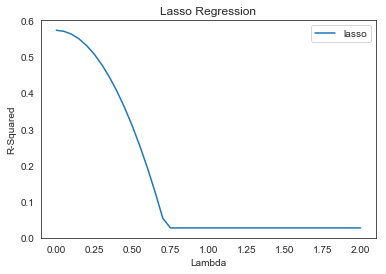

In [18]:
plt.plot(df["lambda"].values, df["R-Squared"].values, label="lasso")
plt.xlabel("Lambda")
plt.ylabel("R-Squared")
plt.title("Lasso Regression")

plt.legend()

In [49]:
newridgedata = []
for lambd in lambdas:
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    newridgedata.append([lambd, ridgeregrBig.score(X_train2, Y_train)])

C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.858825e-23
  overwrite_a=True).T
C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.125420e-18
  overwrite_a=True).T
C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.828186e-17
  overwrite_a=True).T
C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not g

In [51]:
newridgedata

[[0, 0.5739733101711644],
 [0.05, 0.5739723222458903],
 [0.1, 0.5739722663409712],
 [0.15, 0.5739721793919582],
 [0.2, 0.573972065707383],
 [0.25, 0.5739719290263617],
 [0.3, 0.5739717725978604],
 [0.35, 0.5739715992504427],
 [0.4, 0.5739714114491674],
 [0.45, 0.5739712113466504],
 [0.5, 0.5739710008243197],
 [0.55, 0.5739707815282631],
 [0.6, 0.5739705549006646],
 [0.65, 0.5739703222054792],
 [0.7, 0.573970084551763],
 [0.75, 0.5739698429127247],
 [0.8, 0.5739695981427886],
 [0.85, 0.5739693509921011],
 [0.9, 0.5739691021196606],
 [0.95, 0.5739688521034911],
 [1, 0.5739686014515943],
 [1.1, 0.5739680999645341],
 [1.5, 0.5739661350088407],
 [2, 0.5739638611812111]]

In [52]:
df2 = pd.DataFrame(newridgedata)

In [53]:
df2.columns = [["lambda", "R-Squared"]]

Text(0.5,1,'Ridge Regression')

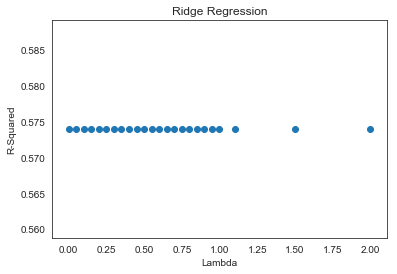

In [54]:
plt.scatter(df2["lambda"], df2["R-Squared"])
plt.xlabel("Lambda")
plt.ylabel("R-Squared")
plt.title("Ridge Regression")


Text(0.5,1,'Lasso and Ridge Regression')

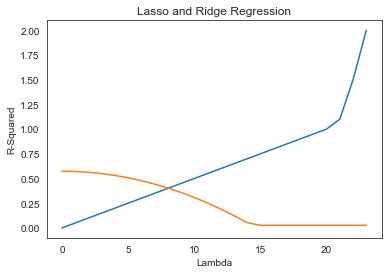

In [63]:
# I effectively plotted scatter plots of the R-Squared/lambda relationship for both lasso and ridge regression 
#but not line plots yet. Going to move on to the challenge and let's talk about this in our session.

#The R-squared scores are the most similar between lasso and ridge when lambda is equal to zero, which makes sense because 
#then it's just OLS for both

x = df["lambda"]
y = df["R-Squared"]

plt.plot(new)
plt.xlabel("Lambda")
plt.ylabel("R-Squared")
plt.title("Lasso and Ridge Regression")
